In [1]:
import pandas as pd

# Carga el CSV
df = pd.read_csv("BTCUSDT_1d_full.csv")

# Muestra las primeras filas
print(df.head())


       Open Time     Open     High      Low    Close       Volume  \
0  1502928000000  4261.48  4485.39  4200.74  4285.08   795.150377   
1  1503014400000  4285.08  4371.52  3938.77  4108.37  1199.888264   
2  1503100800000  4108.37  4184.69  3850.00  4139.98   381.309763   
3  1503187200000  4120.98  4211.08  4032.62  4086.29   467.083022   
4  1503273600000  4069.13  4119.62  3911.79  4016.00   691.743060   

      Close Time  Quote Asset Volume  Number of Trades  \
0  1503014399999        3.454770e+06              3427   
1  1503100799999        5.086958e+06              5233   
2  1503187199999        1.549484e+06              2153   
3  1503273599999        1.930364e+06              2321   
4  1503359999999        2.797232e+06              3972   

   Taker Buy Base Asset Volume  Taker Buy Quote Asset Volume        Ignore  
0                   616.248541                  2.678216e+06   8733.911395  
1                   972.868710                  4.129123e+06   9384.141409  
2    

In [4]:
import pandas as pd
import pandas as pd

pd.to_datetime(1502928000000, unit='ms')



Timestamp('2017-08-17 00:00:00')

In [5]:
# Mantener solo timestamps entre 2010 y 2035
df = df[(df['open_time'] > 1262304000000) & (df['open_time'] < 2051222400000)]

# Convertir a datetime
df["open_time"] = pd.to_datetime(df["open_time"], unit='ms', errors='coerce')
df["close_time"] = pd.to_datetime(df["close_time"], unit='ms', errors='coerce')

# Quitar filas inválidas
df = df.dropna(subset=["open_time", "close_time"]).reset_index(drop=True)

df.head()


,open_time,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970


In [6]:
#Información general del dataset:

df.info()
df.describe()


#Comprobar valores nulos:

df.isnull().sum()


#Resumen básico:

print(f"Fechas: {df['open_time'].min()} -> {df['open_time'].max()}")
print(f"Número de registros: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open_time           2694 non-null   datetime64[ns]
 1   open                2694 non-null   float64       
 2   high                2694 non-null   float64       
 3   low                 2694 non-null   float64       
 4   close               2694 non-null   float64       
 5   volume              2694 non-null   float64       
 6   close_time          2694 non-null   datetime64[ns]
 7   quote_volume        2694 non-null   float64       
 8   num_trades          2694 non-null   int64         
 9   taker_base_volume   2694 non-null   float64       
 10  taker_quote_volume  2694 non-null   float64       
 11  ignore              2694 non-null   float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 252.7 KB
Fechas: 2017-08-17 00:00:00 -> 2024-12

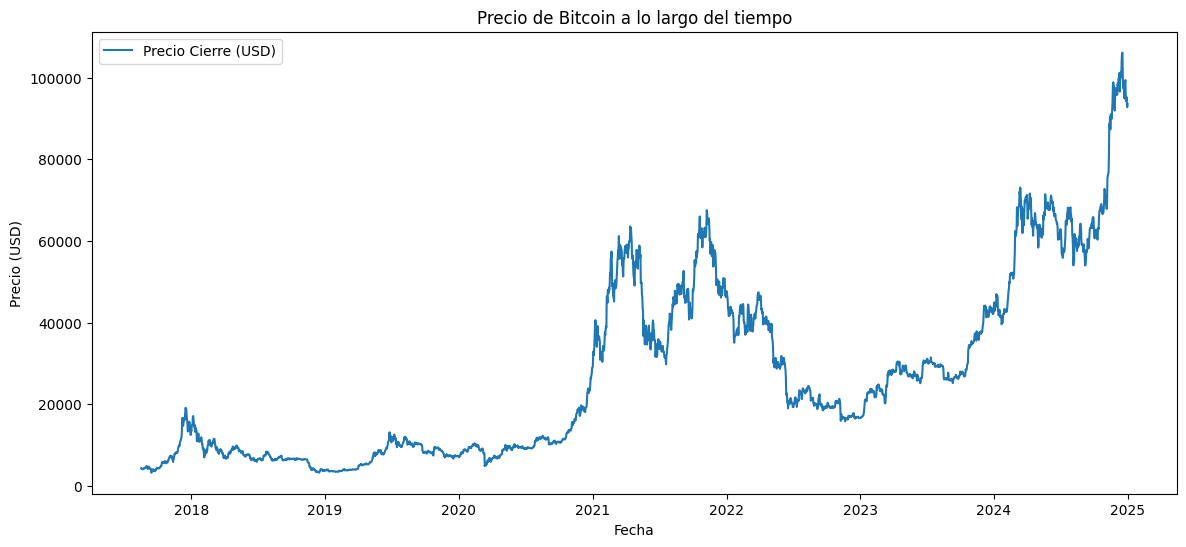

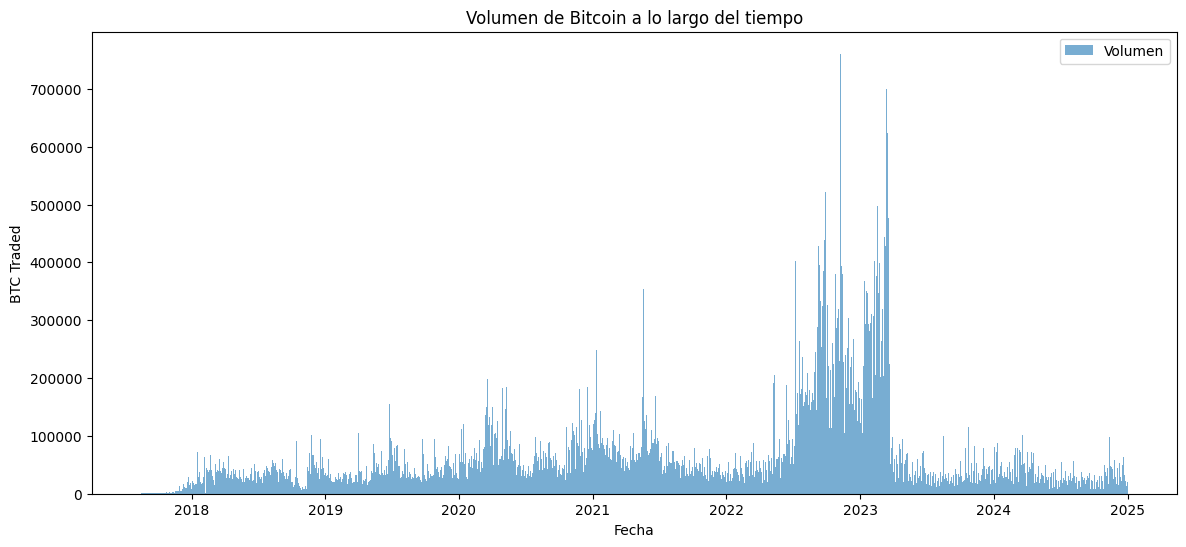

In [7]:
#Gráfico de precios:

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["open_time"], df["close"], label="Precio Cierre (USD)")
plt.title("Precio de Bitcoin a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


#Gráfico de volumen:

plt.figure(figsize=(14,6))
plt.bar(df["open_time"], df["volume"], width=1, label="Volumen", alpha=0.6)
plt.title("Volumen de Bitcoin a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("BTC Traded")
plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np

# === 1. Medias móviles ===
df["SMA_20"] = df["close"].rolling(window=20).mean()  # Media móvil simple de 20 días
df["SMA_50"] = df["close"].rolling(window=50).mean()  # Media móvil simple de 50 días
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()  # Media móvil exponencial de 20 días

# === 2. Retornos diarios ===
df["daily_return"] = df["close"].pct_change() * 100  # % de cambio diario

# === 3. Volatilidad histórica (rolling std) ===
df["volatility_20d"] = df["daily_return"].rolling(window=20).std()  # desviación estándar 20 días

# === 4. RSI (Relative Strength Index) ===
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["RSI_14"] = compute_rsi(df["close"], period=14)

# === 5. Tendencia simple (basada en cruce de medias móviles) ===
df["trend"] = np.where(df["SMA_20"] > df["SMA_50"], "Alcista", "Bajista")

# Mostrar últimas filas
print(df.tail(10))


      open_time      open      high       low     close       volume  \
2684 2024-12-22  97292.00  97448.08  94250.35  95186.27  19353.83036   
2685 2024-12-23  95186.28  96538.92  92520.00  94881.47  32810.76703   
2686 2024-12-24  94881.47  99487.99  93569.02  98663.58  23674.22488   
2687 2024-12-25  98663.58  99569.15  97632.02  99429.60  14474.16510   
2688 2024-12-26  99429.61  99963.70  95199.14  95791.60  21192.36727   
2689 2024-12-27  95791.60  97544.58  93500.01  94299.03  26501.26429   
2690 2024-12-28  94299.03  95733.99  94135.66  95300.00   8385.89290   
2691 2024-12-29  95300.00  95340.00  93009.52  93738.20  13576.00578   
2692 2024-12-30  93738.19  95024.50  91530.45  92792.05  27619.42250   
2693 2024-12-31  92792.05  96250.00  92033.73  93576.00  19612.03389   

                  close_time  quote_volume  num_trades  taker_base_volume  \
2684 2024-12-22 23:59:59.999  1.857820e+09     3633551         9293.39749   
2685 2024-12-23 23:59:59.999  3.100007e+09     546491

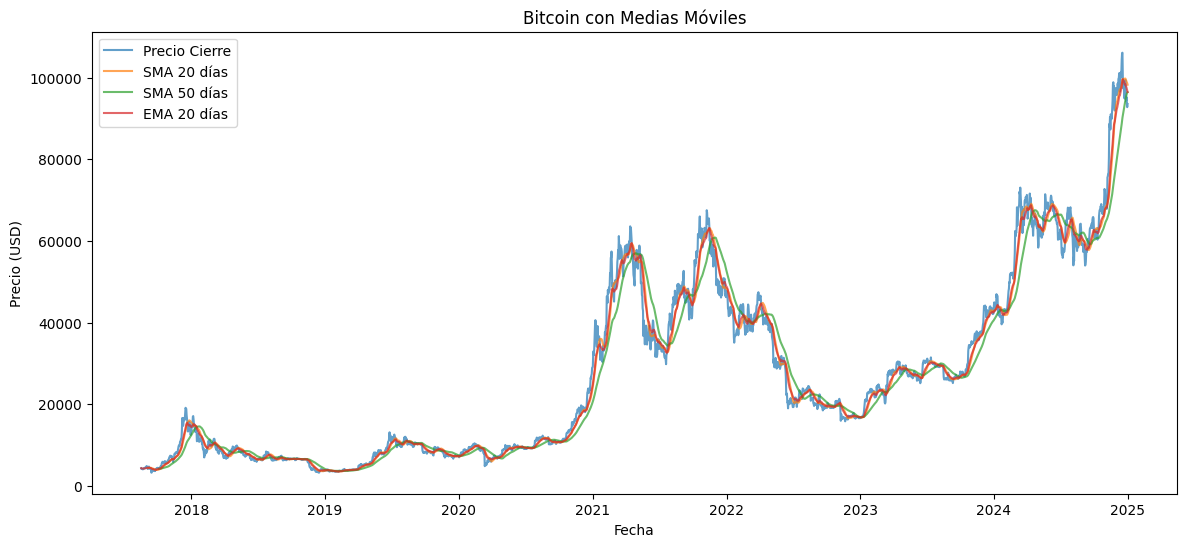

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["open_time"], df["close"], label="Precio Cierre", alpha=0.7)
plt.plot(df["open_time"], df["SMA_20"], label="SMA 20 días", alpha=0.7)
plt.plot(df["open_time"], df["SMA_50"], label="SMA 50 días", alpha=0.7)
plt.plot(df["open_time"], df["EMA_20"], label="EMA 20 días", alpha=0.7)
plt.title("Bitcoin con Medias Móviles")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


In [1]:
import pandas as pd

# Carga el CSV
df = pd.read_csv("SOLUSDT_1d_full.csv")

# Muestra las primeras filas
print(df.head())

    Open Time    Open    High     Low   Close      Volume  \
0  2020-08-11  2.8500  3.5208  2.8433  3.2985  1552384.78   
1  2020-08-12  3.2985  3.9289  3.0800  3.7558  1737042.95   
2  2020-08-13  3.7500  4.1387  3.5003  3.7300  1685759.24   
3  2020-08-14  3.7207  3.7676  3.3210  3.4099  1474161.79   
4  2020-08-15  3.4181  3.7400  3.1500  3.1730  1070233.20   

                Close Time  Quote Asset Volume  Number of Trades  \
0  2020-08-11 23:59:59.999        4.939149e+06             13490   
1  2020-08-12 23:59:59.999        6.176154e+06             21118   
2  2020-08-13 23:59:59.999        6.446568e+06             22922   
3  2020-08-14 23:59:59.999        5.205834e+06             18581   
4  2020-08-15 23:59:59.999        3.658006e+06             13903   

   Taker Buy Base Asset Volume  Taker Buy Quote Asset Volume  Ignore  
0                    741770.79                  2.370193e+06       0  
1                    889133.50                  3.161944e+06       0  
2          

In [6]:
import pandas as pd

# Cargar el dataset completo
full_df = pd.read_csv("SOLUSDT_1d_full.csv")

# Convertir la columna de fechas a datetime
full_df["Open Time"] = pd.to_datetime(full_df["Open Time"])
full_df["Close Time"] = pd.to_datetime(full_df["Close Time"])



In [7]:
# Medias móviles
full_df['MA7'] = full_df['Close'].rolling(7).mean()
full_df['MA21'] = full_df['Close'].rolling(21).mean()

# Retornos diarios
full_df['Return'] = full_df['Close'].pct_change()

# Precios rezagados (lags)
full_df['Close_lag1'] = full_df['Close'].shift(1)
full_df['Close_lag2'] = full_df['Close'].shift(2)


In [8]:
#Eliminar filas con valores nulos (porque los indicadores y lags generan NaN al inicio):

full_df = full_df.dropna()

In [9]:
#Definir variables de entrenamiento y target:

# Features
X = full_df[['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21', 'Return', 'Close_lag1', 'Close_lag2']]

# Target (precio de cierre del día siguiente)
y = full_df['Close'].shift(-1)  # desplazamos una fila hacia arriba
X = X[:-1]  # eliminamos la última fila sin target
y = y[:-1]

In [4]:
import pandas as pd

# 1. Cargar el dataset (ajusta el nombre si es diferente)
full_df = pd.read_csv("SOLUSDT_1d_full.csv")

# 2. Convertir las fechas
full_df["Open Time"] = pd.to_datetime(full_df["Open Time"])
full_df["Close Time"] = pd.to_datetime(full_df["Close Time"])

# 3. Crear features
full_df['MA7'] = full_df['Close'].rolling(7).mean()
full_df['MA21'] = full_df['Close'].rolling(21).mean()
full_df['Return'] = full_df['Close'].pct_change()
full_df['Close_lag1'] = full_df['Close'].shift(1)
full_df['Close_lag2'] = full_df['Close'].shift(2)

# 4. Limpiar valores nulos
full_df = full_df.dropna()

# 5. Definir variables X (features) y y (target)
X = full_df[['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21', 'Return', 'Close_lag1', 'Close_lag2']]
y = full_df['Close'].shift(-1)  # Queremos predecir el precio del siguiente día

# Eliminar la última fila porque no tiene target
X = X[:-1]
y = y[:-1]

# 6. Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1266, 9) (317, 9) (1266,) (317,)


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)



NameError: name 'X_train' is not defined

In [6]:
#Evaluar el modelo (Métricas de error)
#Vamos a calcular MAE, RMSE y R² para ver qué tan bien predice:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE: {mae:.4f}")
print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 R²: {r2:.4f}")

📊 MAE: 6.5063
📊 RMSE: 8.1859
📊 R²: 0.9349


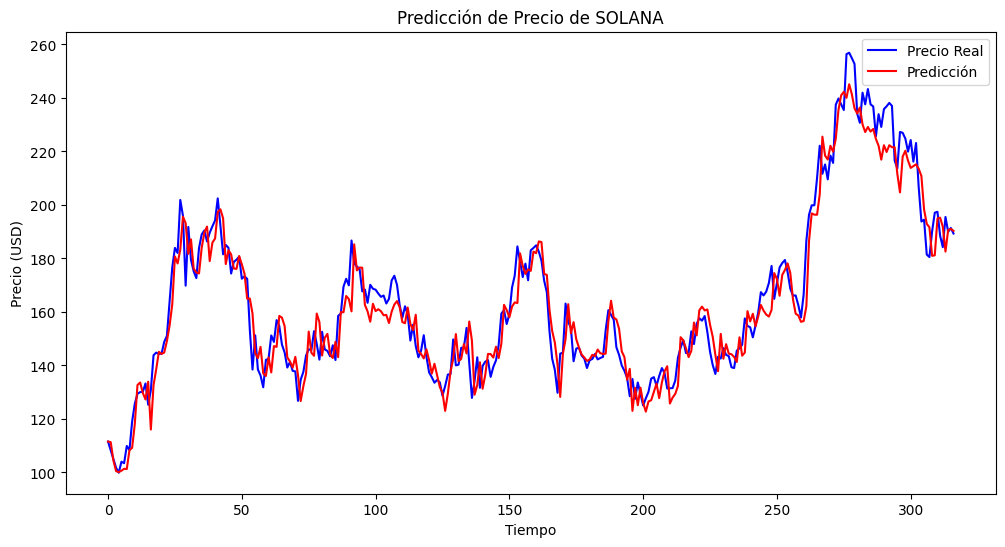

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Precio Real", color='blue')
plt.plot(y_pred, label="Predicción", color='red')
plt.title("Predicción de Precio de SOLANA")
plt.xlabel("Tiempo")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np

# Vamos a usar las últimas filas para simular una predicción
ultimos_datos = X.tail(7)  # Cambia 7 por el número de días que quieras predecir
predicciones_futuras = model.predict(ultimos_datos)

# Mostrar predicciones
fechas_futuras = pd.date_range(start=full_df["Open Time"].iloc[-1], periods=8, freq='D')[1:]
pred_df = pd.DataFrame({"Fecha": fechas_futuras, "Predicción Precio SOL": predicciones_futuras})

print(pred_df)


NameError: name 'X' is not defined

In [ ]:
#Prophet
import pandas as pd
from prophet import Prophet

# Preparar dataset
df_prophet = full_df[['Open Time', 'Close']].rename(columns={"Open Time": "ds", "Close": "y"})

# Asegúrate de que las fechas estén en datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [10]:
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)


19:19:42 - cmdstanpy - INFO - Chain [1] start processing
19:19:42 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#obtener predicciones futuras
future = model.make_future_dataframe(periods=30)  # 30 días hacia adelante
forecast = model.predict(future)


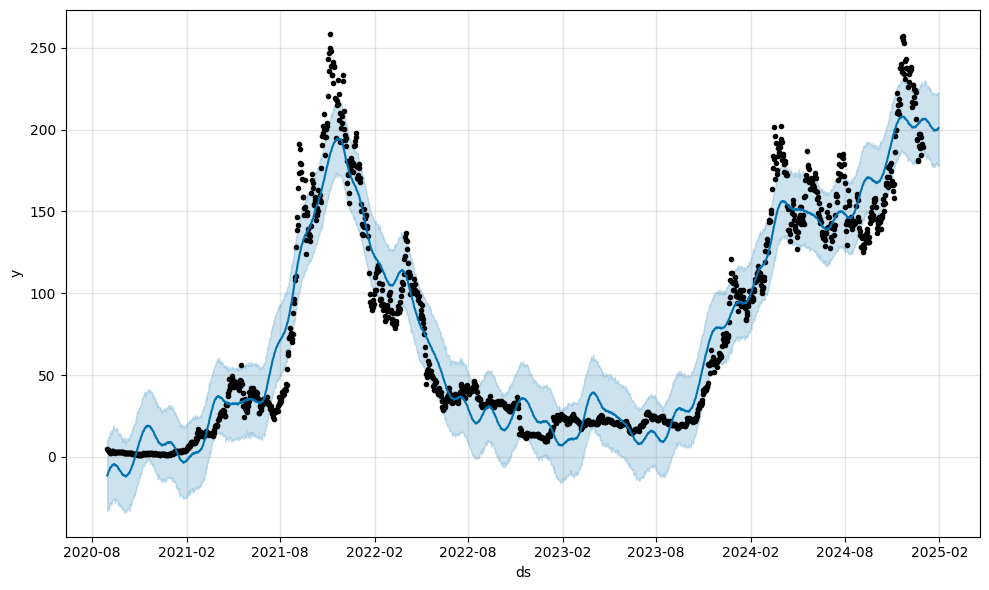

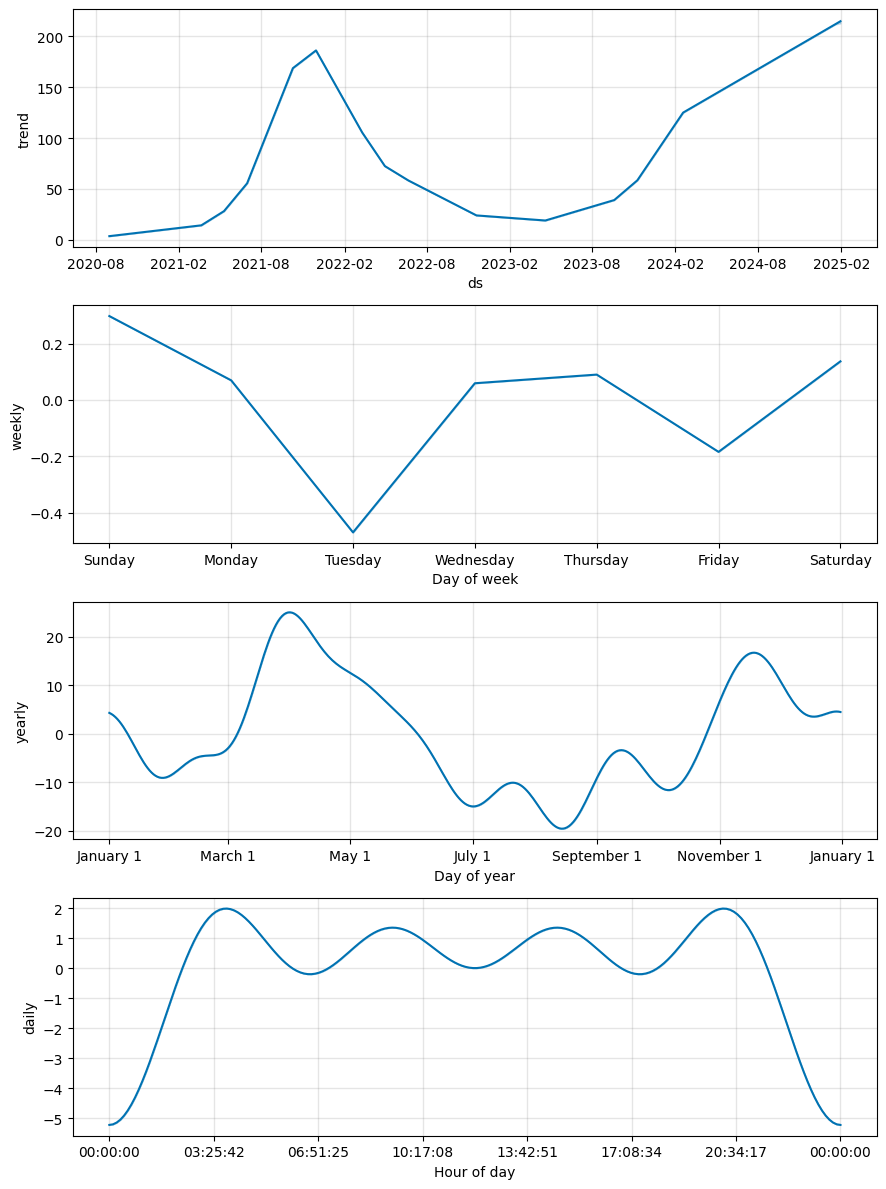

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

# Plot predicción completa
model.plot(forecast)
plt.show()

# Plot de componentes (tendencia, estacionalidad)
model.plot_components(forecast)
plt.show()
#Gráfica principal: model.plot(forecast)

#Esta es la gráfica de predicciones completas:

#Eje X → tiempo (fechas)

#Eje Y → precio pronosticado (y)

#Línea azul → valores pronosticados (yhat)

#Banda azul clara → intervalo de confianza del 95% (yhat_lower y yhat_upper)

#Puntos negros → valores históricos del dataset (y)

# Interpretación:

#La línea azul sigue la tendencia que Prophet estima basada en tus datos históricos.

#La banda azul clara muestra la incertidumbre: si el precio futuro se mantiene dentro de esa banda, la predicción se considera plausible.

#Esta gráfica te permite ver si el modelo captura bien la tendencia general y la volatilidad de Solana.

In [10]:
import datetime

# Fecha de hoy
hoy = pd.to_datetime("today").normalize()

# Filtrar forecast para fechas desde hoy en adelante
predicciones_futuras = forecast[forecast['ds'] >= hoy][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(predicciones_futuras)


NameError: name 'forecast' is not defined

          ds           y
0 2024-09-04  127.582776
1 2024-09-05  133.568180
2 2024-09-06  129.273730
3 2024-09-07  124.887949
4 2024-09-08  127.687734
            ds           y
360 2025-08-30  205.083353
361 2025-08-31  202.710142
362 2025-09-01  200.900995
363 2025-09-02  196.883820
364 2025-09-03  209.230367


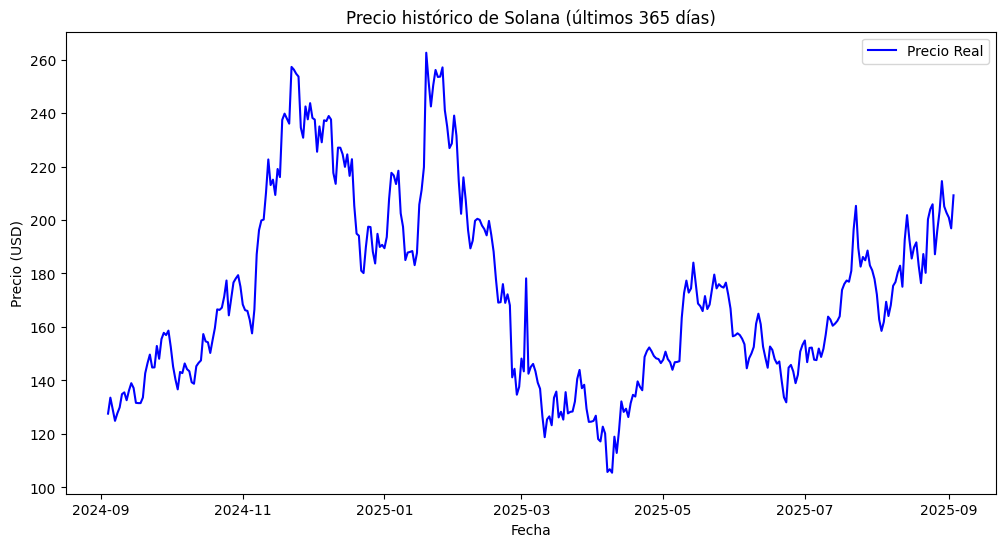

In [1]:
import pandas as pd

df = pd.read_csv('solana_last365.csv')
df['ds'] = pd.to_datetime(df['ds'])

print(df.head())   # Primeros 5 registros
print(df.tail())   # Últimos 5 registros

# Gráfica simple de precio histórico
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='Precio Real', color='blue')
plt.title('Precio histórico de Solana (últimos 365 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


In [12]:
print(df.head())
print(df.tail())
print(df.shape)



          ds           y
0 2024-09-04  127.582776
1 2024-09-05  133.568180
2 2024-09-06  129.273730
3 2024-09-07  124.887949
4 2024-09-08  127.687734
            ds           y
360 2025-08-30  205.083353
361 2025-08-31  202.710142
362 2025-09-01  200.900995
363 2025-09-02  196.883820
364 2025-09-03  209.230367
(365, 2)


In [14]:
import pandas as pd
from prophet import Prophet

# df debe tener columnas 'ds' y 'y'
df['ds'] = pd.to_datetime(df['ds'])


In [ ]:
#Crear y entrenar el modelo Prophet:
model = Prophet(daily_seasonality=True)
model.fit(df)


20:24:29 - cmdstanpy - INFO - Chain [1] start processing
20:24:29 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
#Generar fechas futuras (por ejemplo, 30 días desde hoy):

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

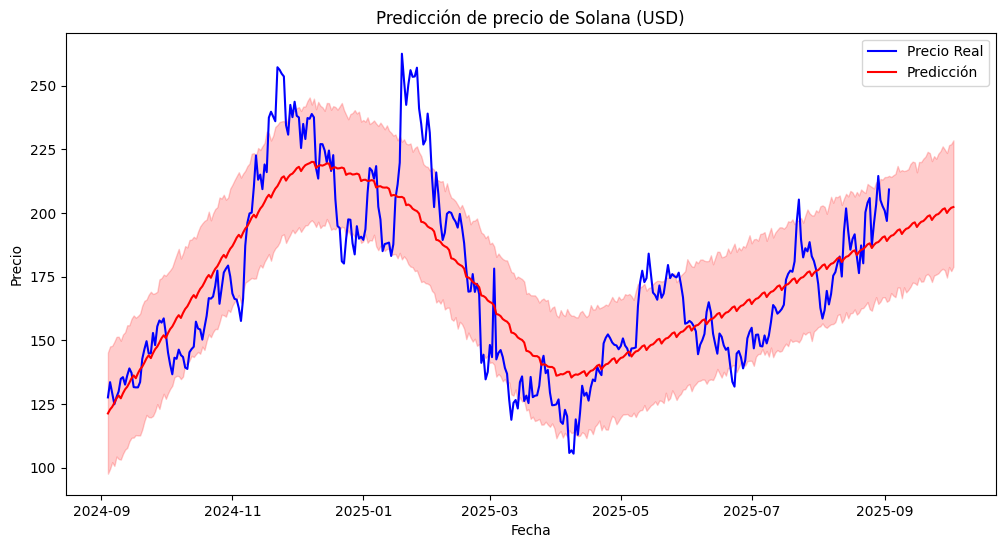

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='Precio Real', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
plt.title('Predicción de precio de Solana (USD)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [19]:
import pandas as pd

# Carga el CSV
df = pd.read_csv("solana_forecast.csv")

# Muestra las primeras filas
print(df.head(30))

            ds        yhat  yhat_lower  yhat_upper
0   2024-09-04  121.282448   96.916767  143.794436
1   2024-09-05  122.849999  100.278967  146.724910
2   2024-09-06  123.875825  101.031589  147.730074
3   2024-09-07  125.452445  101.964075  148.027920
4   2024-09-08  127.178122  103.942844  150.432638
5   2024-09-09  128.330818  103.934671  151.975445
6   2024-09-10  127.229429  104.069268  151.423213
7   2024-09-11  129.171565  105.198925  152.981805
8   2024-09-12  130.739116  106.077374  153.025936
9   2024-09-13  131.764942  109.306007  157.505274
10  2024-09-14  133.341562  111.217381  155.608309
11  2024-09-15  135.067239  110.288102  158.351691
12  2024-09-16  136.219935  111.863580  158.559870
13  2024-09-17  135.118546  111.020720  156.903061
14  2024-09-18  137.060682  113.535917  161.110248
15  2024-09-19  138.628233  114.686681  161.509077
16  2024-09-20  139.654059  115.447697  164.174020
17  2024-09-21  141.230679  115.529696  165.698703
18  2024-09-22  142.956356  118